In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. 데이터 로드
df = pd.read_csv("marketing_advanced.csv", encoding="cp949")


In [2]:
print("✅ 데이터 크기:", df.shape)


✅ 데이터 크기: (104899, 25)


In [3]:
print("\n✅ 데이터 타입 & 결측치 확인")
print(df.info())



✅ 데이터 타입 & 결측치 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 non-null  object 
 11  payment_installments           104899 non-null  int64  
 12  seller_id  

In [4]:
# ✅ 2. 결측치 비율 확인
missing_ratio = df.isnull().sum() / len(df) * 100
print("\n✅ 결측치 비율(%)")
print(missing_ratio[missing_ratio > 0].sort_values(ascending=False))



✅ 결측치 비율(%)
order_delivered_timestamp    2.169706
delivery_delay_days          2.169706
approval_delay_minutes       0.013346
dtype: float64


In [5]:
# ✅ 3. 기본 통계 (수치형 컬럼만)
print("\n✅ 기본 통계 요약")
print(df.describe())



✅ 기본 통계 요약
                age  payment_installments  shipping_charges          price  \
count  104899.00000         104899.000000     104899.000000  104899.000000   
mean       40.49357              2.961306         19.319317      68.254875   
std        13.88267              2.749901         15.770373      28.545219   
min        17.00000              0.000000          0.000000      27.240000   
25%        28.00000              1.000000         12.000000      44.050000   
50%        41.00000              2.000000         16.000000      60.050000   
75%        53.00000              4.000000         20.000000      83.270000   
max        64.00000             24.000000        409.000000     146.170000   

       delivery_delay_days  approval_delay_minutes      weight_kg  \
count        102623.000000           104885.000000  104899.000000   
mean            -11.993442              614.228774       4.392311   
std              10.204775             1287.408988       5.168172   
min      

In [6]:
# ✅ 4. 수치형 컬럼만 선택
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("✅ 수치형 컬럼:", numeric_cols.tolist())


✅ 수치형 컬럼: ['age', 'payment_installments', 'shipping_charges', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score']


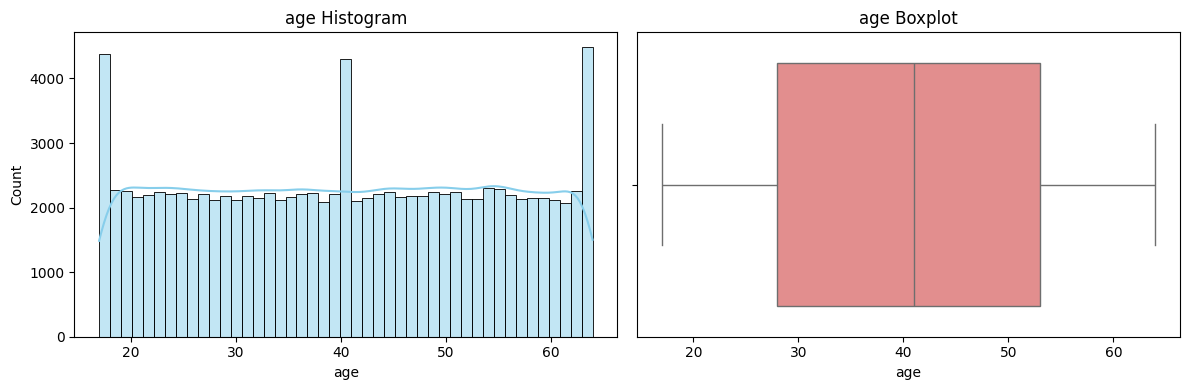

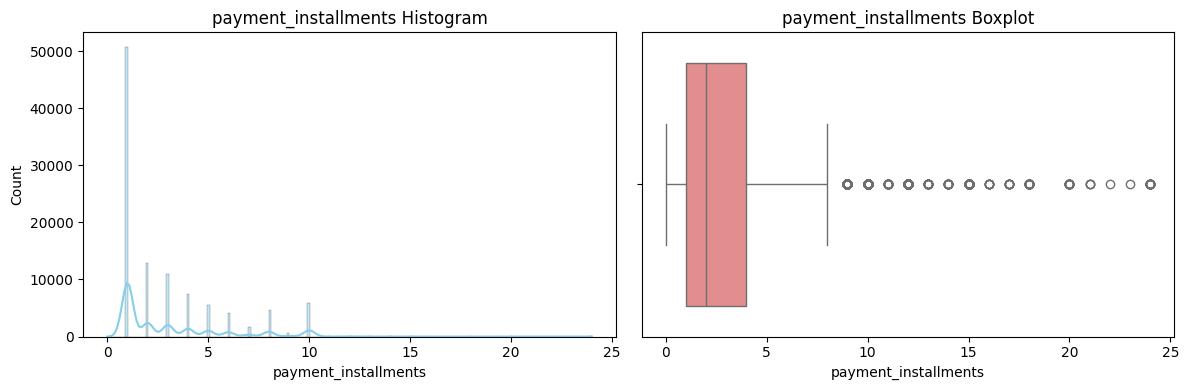

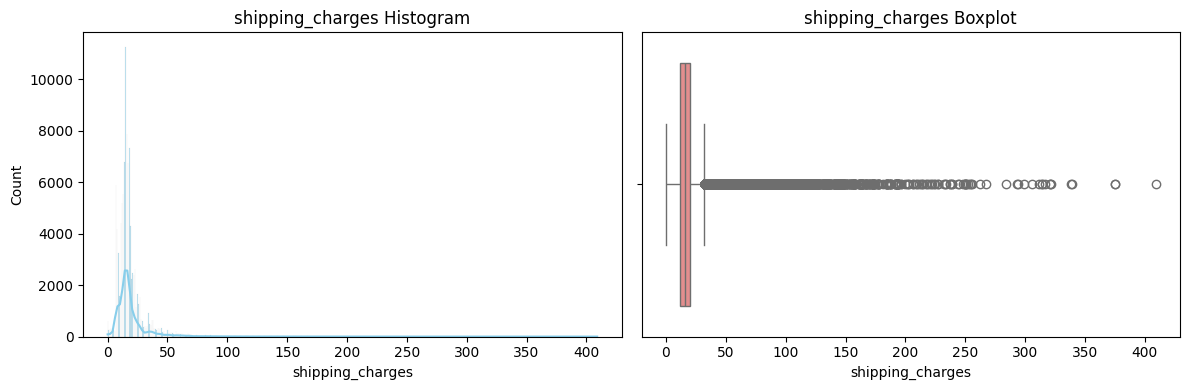

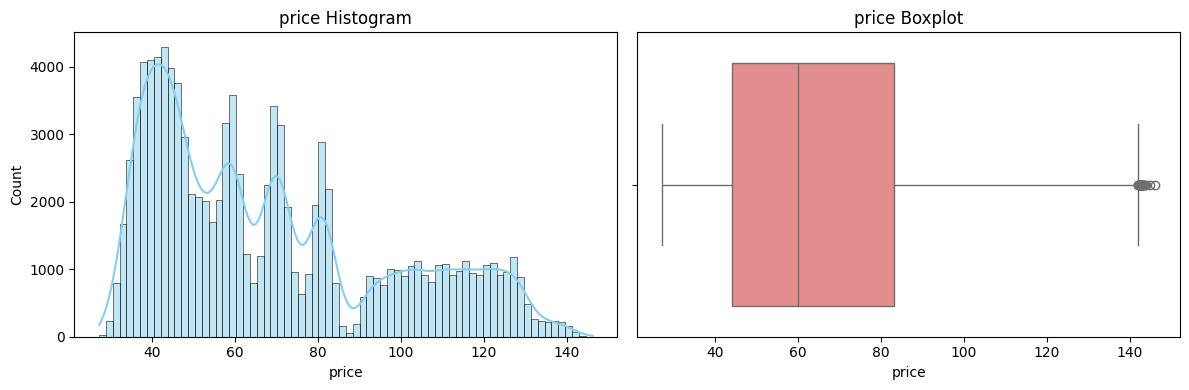

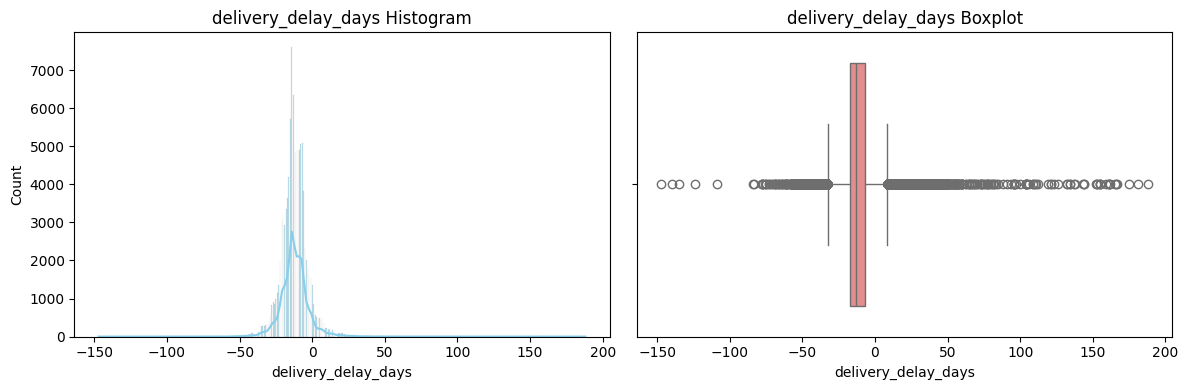

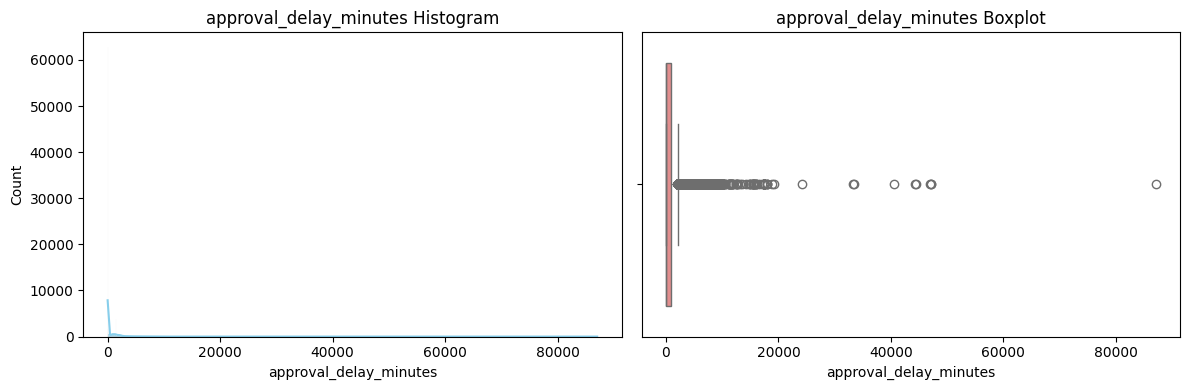

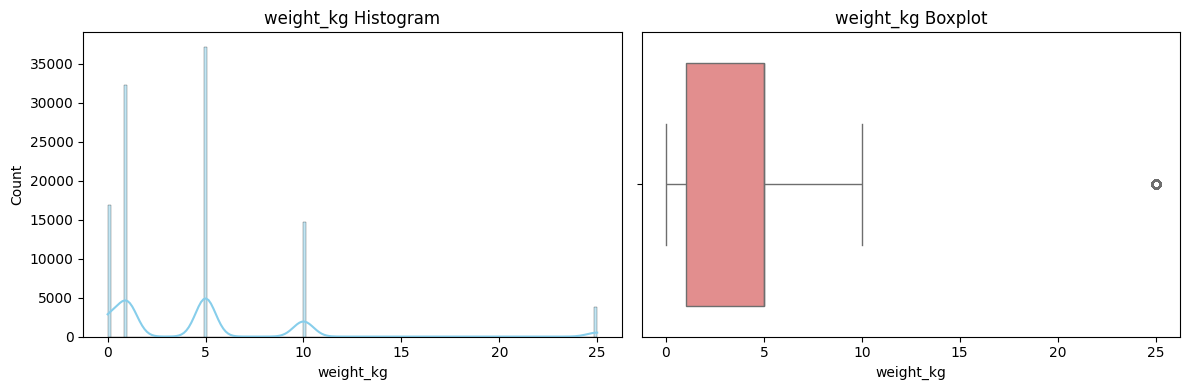

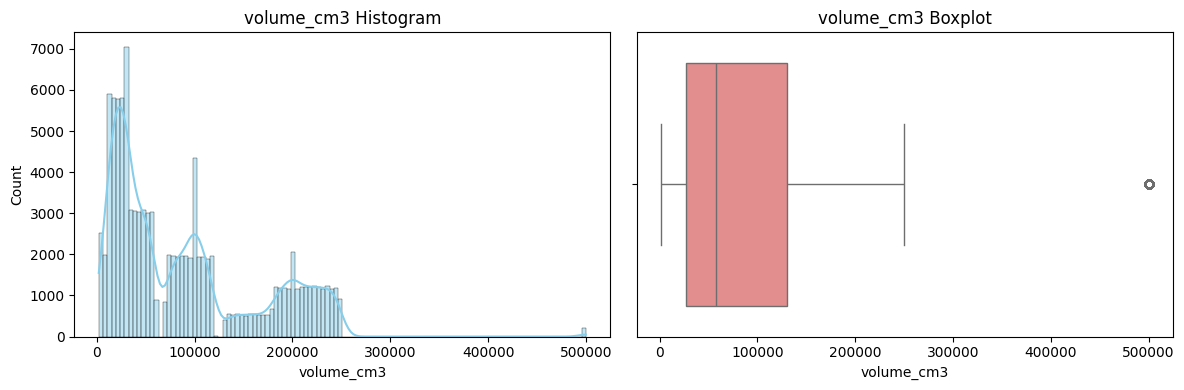

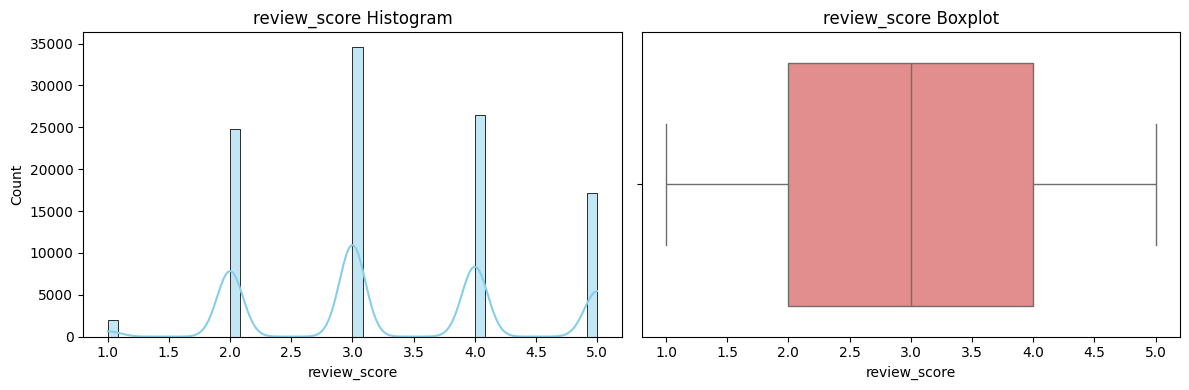

In [7]:
# ✅ 5. 컬럼별 히스토그램 + 박스플롯
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # 히스토그램
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"{col} Histogram")

    # 박스플롯
    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f"{col} Boxplot")

    plt.tight_layout()
    plt.show()


In [9]:
# ✅ 6. IQR 기반 이상치 탐지 함수
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)  # 1사분위수
    Q3 = df[col].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # 사분위수 범위

    lower_bound = Q1 - 1.5 * IQR  # 하한값
    upper_bound = Q3 + 1.5 * IQR  # 상한값

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"✅ {col} 이상치 개수: {len(outliers)} / {len(df)} ({len(outliers)/len(df)*100:.2f}%)")

    return outliers


In [10]:
# ✅ 7. 모든 수치형 컬럼 이상치 탐지
for col in numeric_cols:
    detect_outliers_iqr(df, col)


✅ age 이상치 개수: 0 / 104899 (0.00%)
✅ payment_installments 이상치 개수: 6928 / 104899 (6.60%)
✅ shipping_charges 이상치 개수: 10733 / 104899 (10.23%)
✅ price 이상치 개수: 34 / 104899 (0.03%)
✅ delivery_delay_days 이상치 개수: 4605 / 104899 (4.39%)
✅ approval_delay_minutes 이상치 개수: 9982 / 104899 (9.52%)
✅ weight_kg 이상치 개수: 3834 / 104899 (3.65%)
✅ volume_cm3 이상치 개수: 202 / 104899 (0.19%)
✅ review_score 이상치 개수: 0 / 104899 (0.00%)


In [11]:
# ✅ 8. 도메인 로직 기반 이상치 제거 예시
# 나이(age)가 0세 이하 or 100세 이상 → 제거
df = df[(df['age'] > 0) & (df['age'] < 100)]

# 결제금액(price)가 0 이하 → 제거
df = df[df['price'] > 0]

# 배송지연일(delivery_delay_days)이 -30일 이상 → 제거
df = df[df['delivery_delay_days'] > -30]
